In [10]:
!pip install torch
!pip install opencv-python
!export PYTHONPATH=/home/msiam/Code/temporal_fss/:$PYTHONPATH
!pip install easydict

  Using cached easydict-1.9.tar.gz (6.4 kB)
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=32cefc77951971c09b6d0d2cbd58be5071f4a3dd2b8d236fc94483235089f208
  Stored in directory: /home/msiam/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


  0%|          | 0/1449 [00:00<?, ?it/s]

INFO: pascal -> pascal
INFO: 2 -> 2
>> Start Filtering classes 
>> Removed classes = [] 
>> Kept classes = ['diningtable', 'dog', 'horse', 'motorcycle', 'person'] 
Processing data for [11, 12, 13, 14, 15]


100%|██████████| 1449/1449 [00:00<00:00, 4860.00it/s]


Class:  15


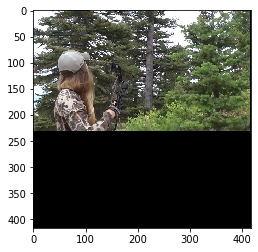

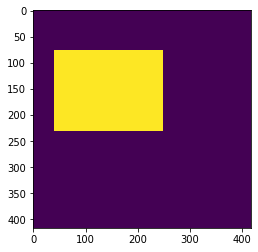

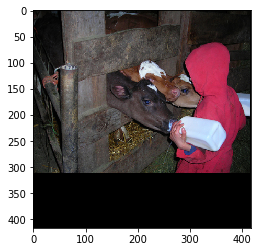

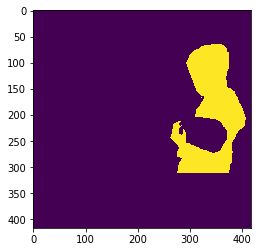

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


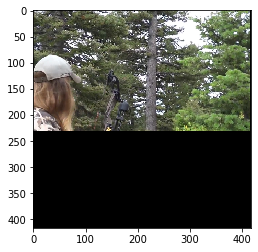

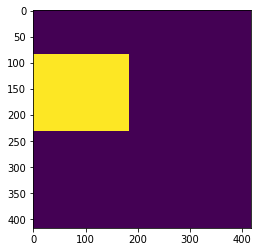

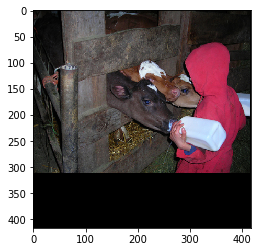

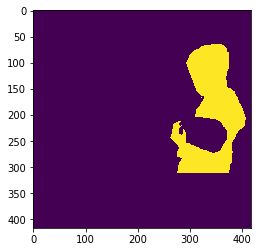

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


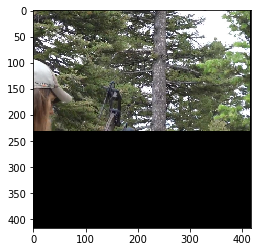

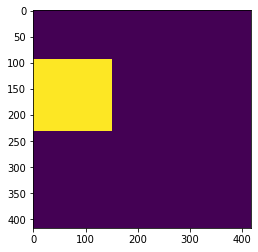

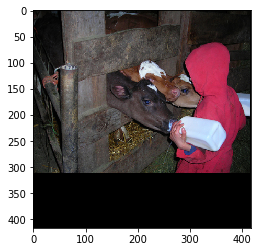

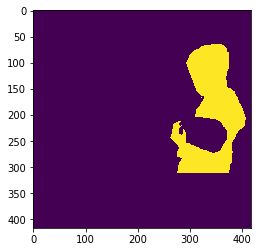

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


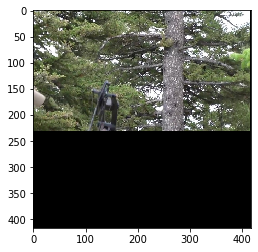

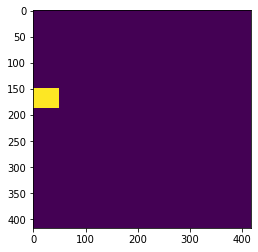

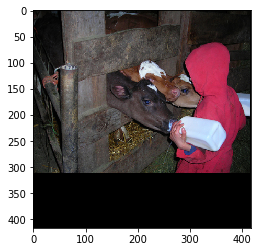

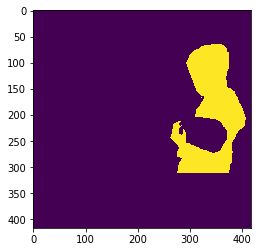

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


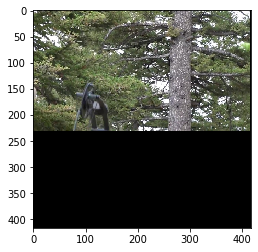

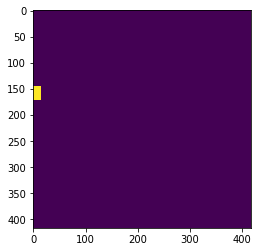

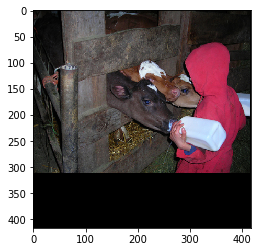

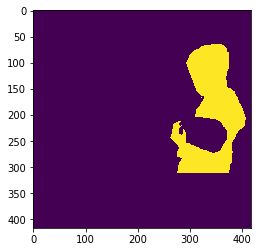

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


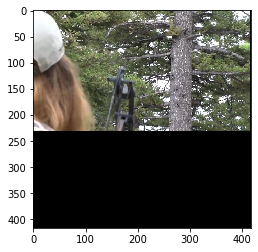

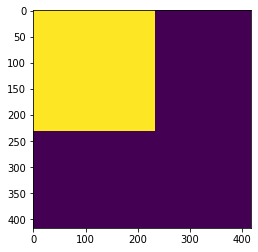

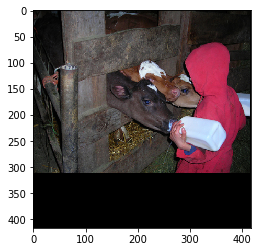

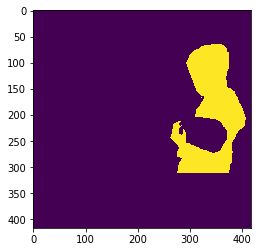

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


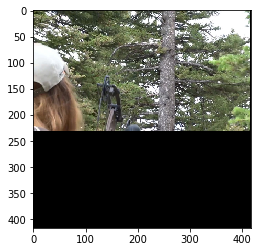

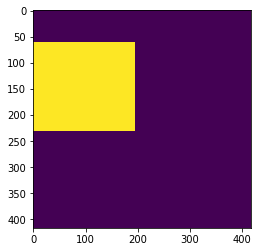

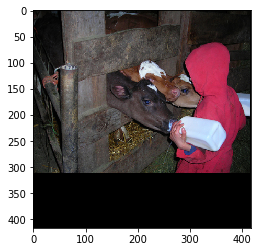

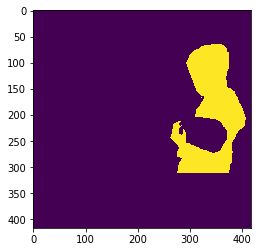

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


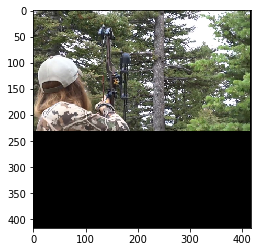

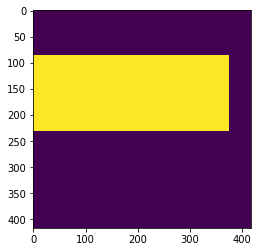

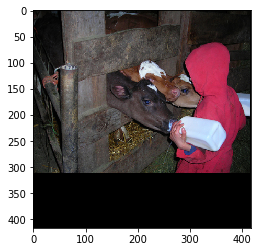

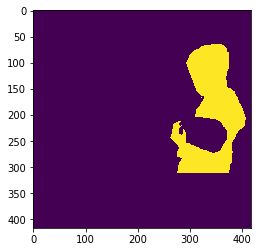

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


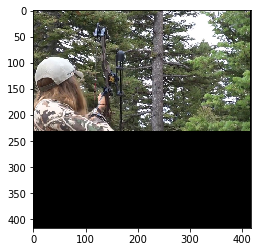

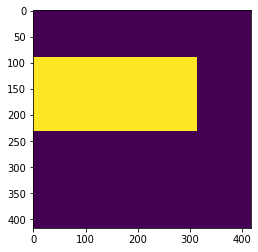

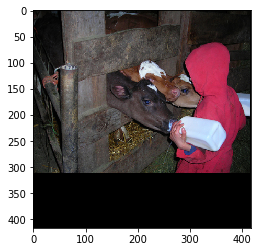

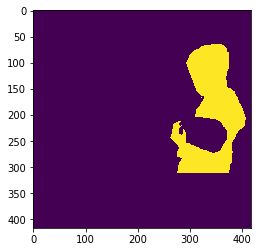

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


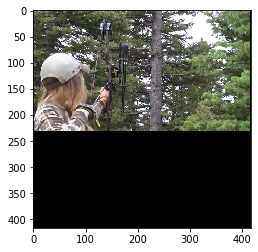

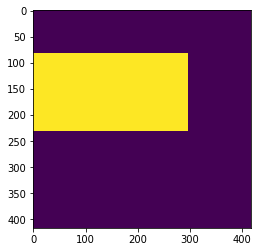

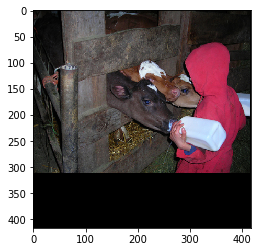

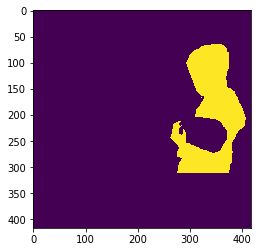

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


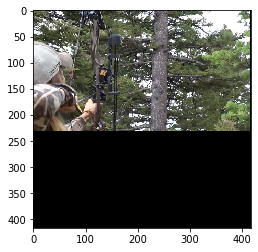

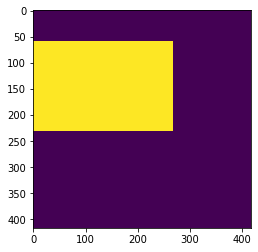

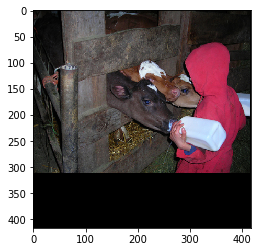

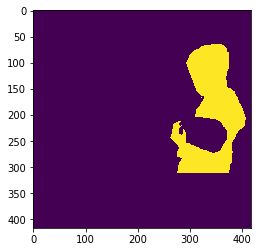

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


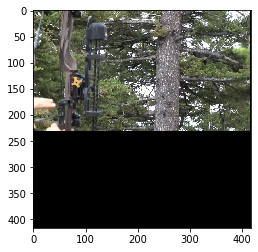

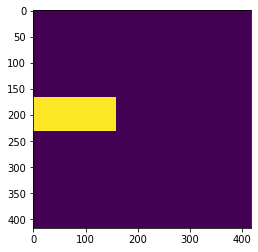

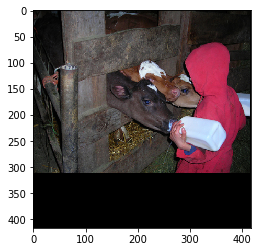

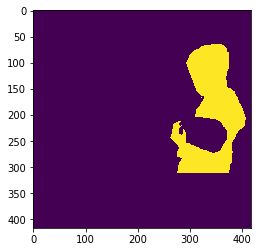

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) c
Class:  15


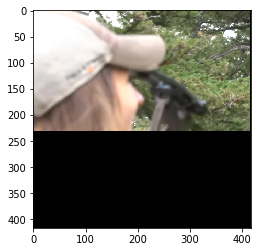

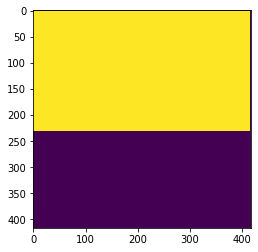

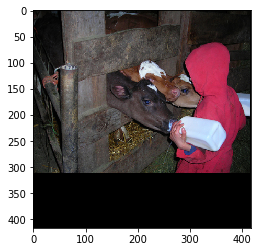

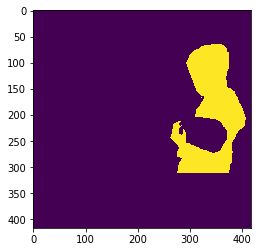

> <ipython-input-2-c7ced664c91d>(48)<module>()
-> for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):
(Pdb) exit


BdbQuit: 

In [2]:

import argparse                                                                                                                                                                                             
import os
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from easydict import EasyDict as edict
%matplotlib inline  

from src.dataset.dataset import get_val_loader

def denormalize(img, mean, scale):
    img = img.permute(1,2,0)
    img = img * torch.tensor(scale) + torch.tensor(mean)
    img = img.cpu().numpy()
    img = np.asarray(img*255, np.uint8)
    return img

if __name__ == "__main__":
    args = {'train_name': 'pascal', 'test_name': 'default', 'train_split': 2, 
            'test_split': 'default', 'train_list': 'lists/pascal/train.txt', 
            'data_root': ['data/pascal/', '/local/riemann/home/msiam/TAO/'], 
            'class_mapping': 'lists/pascal/class_mapping.json', 'class_names_list': 'lists/pascal/classes.json',
            'val_list': 'lists/pascal/val.txt', 'num_classes_tr': 16, 'num_classes_val': 5, 
            'use_split_coco': False, 'workers': 0, 'image_size': 417, 'padding_label': 255, 
            'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225], 'scale_min': 0.5, 'scale_max': 2.0, 
            'rot_min': -10, 'rot_max': 10, 'augmentations': ['hor_flip', 'vert_flip', 'resize'], 
            'ckpt_path': 'checkpoints/', 'batch_size': 12, 'epochs': 100, 'log_freq': 50, 'visdom_port': -1, 
            'debug': False, 'save_models': True, 'lr': 0.0025, 'scale_lr': 1.0, 'mixup': False, 
            'lr_stepsize': 30, 'momentum': 0.9, 'gamma': 0.1, 'nesterov': True, 'weight_decay': 0.0001, 
            'main_optim': 'SGD', 'scheduler': 'cosine', 'milestones': [40, 70], 'arch': 'resnet', 
            'pretrained': True, 'bins': [1, 2, 3, 6], 'dropout': 0.1, 'm_scale': False, 'layers': 50, 
            'bottleneck_dim': 512, 'episodic_val': False, 'temporal_episodic_val': True, 'shot': 1, 
            'random_shot': False, 'norm_feat': True, 'batch_size_val': 200, 'manual_seed': 2020, 
            'ckpt_used': 'best', 'test_num': 1000, 'FB_param_noise': 0, 'smoothing': True, 'n_runs': 2, 
            'save_oracle': False, 'visu': False, 'distance': 'cos', 'temperature': 20.0, 'adapt_iter': 50, 
            'FB_param_type': 'soft', 'weights': [1.0, 'auto', 'auto'], 'cls_lr': 0.025, 'FB_param_update': [10], 
            'cls_visdom_freq': 5, 'gpus': [0]}
    
    args = edict(args)
    
    # ========== Data  ==========
    episodic_val_loader, _ = get_val_loader(args)

    if not os.path.exists('tmp'):
        os.mkdir('tmp')

    for i, (qry_img, q_label, spprt_imgs, s_label, subcls, _, _)  in enumerate(episodic_val_loader):

        qry_img = denormalize(qry_img[0], args.mean, args.std)
        plt.figure(1)
        plt.imshow(qry_img)

        q_label = q_label[0]
        q_label[q_label==255] = 0
        q_label = q_label * 255
        plt.figure(2)
        plt.imshow(q_label.numpy())
        
        for k, (sprt_img, sprt_lbl) in enumerate(zip(spprt_imgs, s_label)):
            sprt_img = denormalize(sprt_img[0], args.mean, args.std)
            plt.figure(3)
            plt.imshow(sprt_img)

            sprt_lbl = sprt_lbl[0]
            sprt_lbl[sprt_lbl==255] = 0
            sprt_lbl = sprt_lbl * 255
            plt.figure(4)
            plt.imshow(sprt_lbl.numpy()) 
            
        plt.show()
        import pdb; pdb.set_trace()